In [2]:
# Avoid zero divisions errors
from __future__ import division

'''---------------------------------------------------'''

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
import math

import inference as ff
from inference import *

In [4]:
df = pd.read_csv('./training.csv')

In [7]:
df.describe().columns

Index(['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [8]:
df2= df[['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']]

In [19]:
diction = pop_parameters_dict(df2)

In [9]:
pop_parameters(df2)

,size,datatype,unique_values,mean,stdv,min,per25,median,per75,max,IQRs,lower_bound,upper_bound
RefId,72983,int64,72983,36511.43,21077.10,1.0,18257.5,36514.0,54764.5,73014.0,36507.0,0.0,109525.0
IsBadBuy,72983,int64,2,0.12,0.33,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
VehYear,72983,int64,10,2005.34,1.73,2001.0,2004.0,2005.0,2007.0,2010.0,3.0,1999.5,2011.5
VehicleAge,72983,int64,10,4.18,1.71,0.0,3.0,4.0,5.0,9.0,2.0,0.0,8.0
WheelTypeID,72983,float64,5,1.49,0.52,0.0,1.0,1.0,2.0,3.0,1.0,0.0,3.5
VehOdo,72983,int64,39947,71500.00,14578.81,4825.0,61837.0,73361.0,82436.0,115717.0,20599.0,30938.5,113334.5
MMRAcquisitionAuctionAveragePrice,72983,float64,10343,6128.91,2461.98,0.0,4273.0,6097.0,7765.0,35722.0,3492.0,0.0,13003.0
MMRAcquisitionAuctionCleanPrice,72983,float64,11380,7373.64,2722.47,0.0,5406.0,7303.0,9021.0,36859.0,3615.0,0.0,14443.5
MMRAcquisitionRetailAveragePrice,72983,float64,12726,8497.03,3156.26,0.0,6280.0,8444.0,10651.0,39080.0,4371.0,0.0,17207.5
MMRAcquisitonRetailCleanPrice,72983,float64,13457,9850.93,3385.77,0.0,7493.0,9789.0,12088.0,41482.0,4595.0,600.5,18980.5


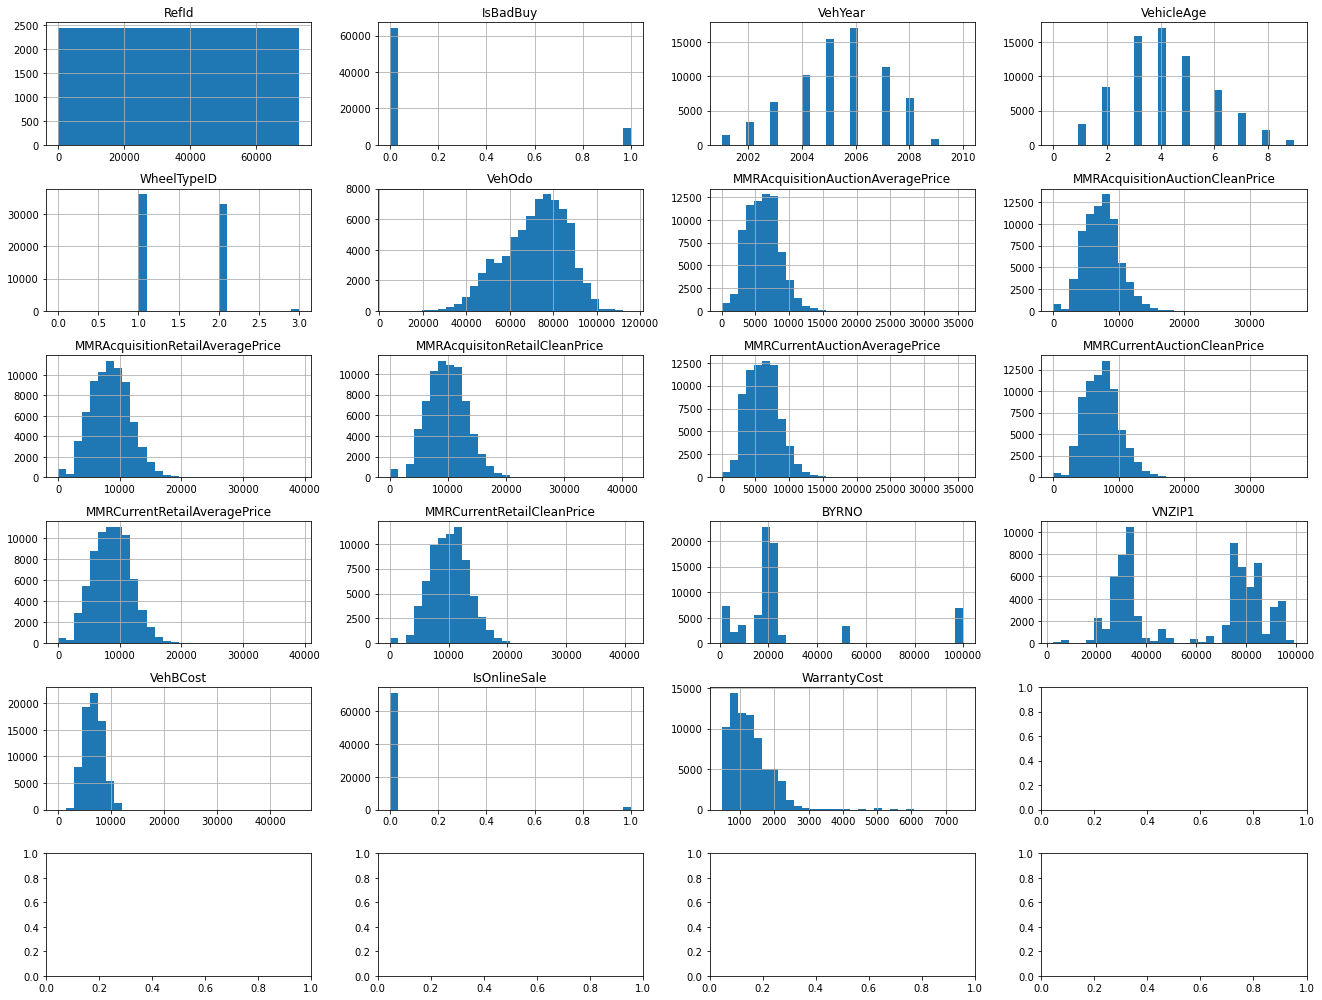

In [13]:
plot_hist_mult(df2,6,4,30)

In [14]:
missing_summary(df)

,n,missing_values,missing_perc
PRIMEUNIT,72983,69564,0.9532
AUCGUART,72983,69564,0.9532
WheelType,72983,3174,0.0435
WheelTypeID,72983,3169,0.0434
Trim,72983,2360,0.0323
MMRCurrentAuctionAveragePrice,72983,315,0.0043
MMRCurrentRetailCleanPrice,72983,315,0.0043
MMRCurrentRetailAveragePrice,72983,315,0.0043
MMRCurrentAuctionCleanPrice,72983,315,0.0043
MMRAcquisitionAuctionAveragePrice,72983,18,0.0002


Remove columns PRIMEUNIT and AUCGUART  they have a 95% of missing values

In [21]:
outlier_summary(df2,diction,'lower_bound','upper_bound')

,n,lower_b,outliers_lower_n,outliers_lower_perc,upper_b,outliers_upper_n,outliers_upper_perc,total_outliers,total_outliers_perc
RefId,72983,0.0,0,0.00,109525.0,0,0.00,0,0.00
IsBadBuy,72983,0.0,0,0.00,0.0,8976,0.12,8976,0.12
VehYear,72983,1999.5,0,0.00,2011.5,0,0.00,0,0.00
VehicleAge,72983,0.0,0,0.00,8.0,646,0.01,646,0.01
WheelTypeID,72983,0.0,0,0.00,3.5,0,0.00,0,0.00
VehOdo,72983,30938.5,332,0.00,113334.5,4,0.00,336,0.00
MMRAcquisitionAuctionAveragePrice,72983,0.0,0,0.00,13003.0,526,0.01,526,0.01
MMRAcquisitionAuctionCleanPrice,72983,0.0,0,0.00,14443.5,841,0.01,841,0.01
MMRAcquisitionRetailAveragePrice,72983,0.0,0,0.00,17207.5,318,0.00,318,0.00
MMRAcquisitonRetailCleanPrice,72983,600.5,828,0.01,18980.5,433,0.01,1261,0.02


#Features with multiple outliers
Byrno - 31%
IsBadBuy - 12%